In [1]:
import sys
import os

import tensorflow as tf
print('TensorFlow:{}'.format(tf.__version__))
import numpy as np
print('NumPy:{}'.format(np.__version__))

import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

base_dir = os.path.abspath('.')

DATASETSLIB_HOME = os.path.join(base_dir, 'datasetslib')

if not DATASETSLIB_HOME in sys.path:
    sys.path.append(DATASETSLIB_HOME)

print(sys.path)

%reload_ext autoreload
%autoreload 2
import datasetslib

mnist = input_data.read_data_sets(os.path.join(datasetslib.datasets_root, 'mnist'), one_hot=True)

print('done.')

TensorFlow:1.13.1
NumPy:1.16.3
['c:\\python36\\python36.zip', 'c:\\python36\\DLLs', 'c:\\python36\\lib', 'c:\\python36', '', 'c:\\python36\\lib\\site-packages', 'c:\\python36\\lib\\site-packages\\pip-9.0.1-py3.6.egg', 'c:\\python36\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\WJ\\.ipython', 'D:\\Work\\tensorflow_test\\ch04\\datasetslib']
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./datasets\mnist\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./datasets\mnist\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./datasets\mnist\t10k-images-idx3-ubyte.gz
Extracting ./datasets\mnist\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please us

In [2]:
num_outputs = 10  # 0-9 digits
num_inputs = 784  # total pixels

# learning_rate = 0.001
# num_epochs = 1
# batch_size = 100
# num_batches = int(mnist.train.num_examples/batch_size)

learning_rate = 0.001
num_epochs = 1
batch_size = 100
num_batches = int(mnist.train.num_examples/batch_size)

x = tf.placeholder(dtype=tf.float32, shape=[None, num_inputs], name='x')
y = tf.placeholder(dtype=tf.float32, shape=[None, num_outputs], name='y')

w = tf.Variable(tf.zeros([784, 10]), name='w')
b = tf.Variable(tf.zeros([10]), name='b')

model = tf.nn.softmax(tf.matmul(x, w) + b)

loss = tf.reduce_mean(-tf.reduce_sum(y * tf.log(model), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

with tf.Session() as tfs:
    tf.global_variables_initializer().run()
    for epoch in range(num_epochs):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        tfs.run(optimizer, feed_dict={x: batch_x, y: batch_y})
        predictions_check = tf.equal(tf.argmax(model, 1), tf.argmax(y, 1))
        accuracy_function = tf.reduce_mean(
            tf.cast(predictions_check, tf.float32)
            )
        feed_dict = {x: mnist.test.images, y: mnist.test.labels}
        accuracy_score = tfs.run(accuracy_function, feed_dict)
        print('opoch {0:04d} accuracy={1:.8f}'.format(epoch, accuracy_score))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
opoch 0000 accuracy=0.17090000


epoch 0000 accuracy = 0.75749999
epoch 0001 accuracy = 0.79890001
epoch 0002 accuracy = 0.81269997
epoch 0003 accuracy = 0.82200003
epoch 0004 accuracy = 0.83200002
epoch 0005 accuracy = 0.83730000
epoch 0006 accuracy = 0.84149998
epoch 0007 accuracy = 0.84509999
epoch 0008 accuracy = 0.85030001
epoch 0009 accuracy = 0.85299999
epoch 0010 accuracy = 0.85720003
epoch 0011 accuracy = 0.86059999
epoch 0012 accuracy = 0.86250001
epoch 0013 accuracy = 0.86430001
epoch 0014 accuracy = 0.86619997
epoch 0015 accuracy = 0.86710000
epoch 0016 accuracy = 0.86890000
epoch 0017 accuracy = 0.87010002
epoch 0018 accuracy = 0.87269998
epoch 0019 accuracy = 0.87379998
epoch 0020 accuracy = 0.87510002
epoch 0021 accuracy = 0.87589997
epoch 0022 accuracy = 0.87709999
epoch 0023 accuracy = 0.87779999
epoch 0024 accuracy = 0.87830001
epoch 0025 accuracy = 0.87930000
epoch 0026 accuracy = 0.87949997
epoch 0027 accuracy = 0.88059998
epoch 0028 accuracy = 0.88139999
epoch 0029 accuracy = 0.88160002


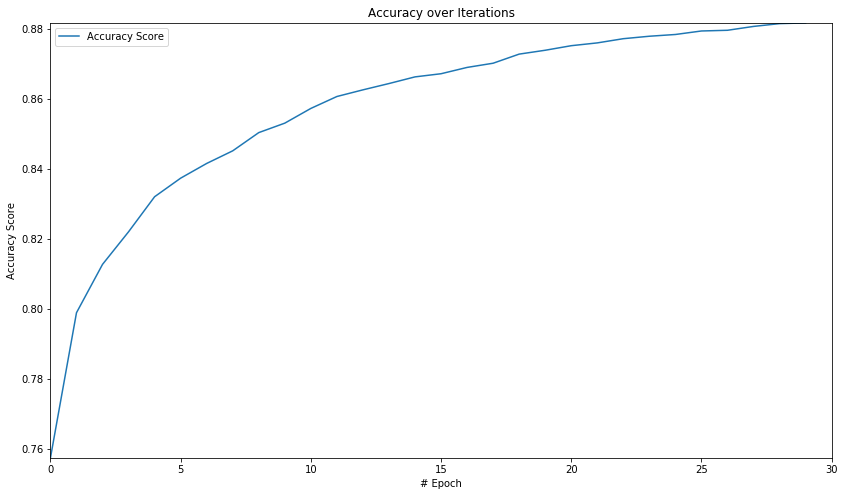

In [4]:
def mnist_batch_func(batch_size=100):
    batch_x, batch_y = mnist.train.next_batch(batch_size)
    return [batch_x, batch_y]

def tensorflow_classification(num_epochs, num_batches, batch_size, batch_func, optimizer, test_x, test_y):
    accuracy_epochs = np.empty(shape=[num_epochs], dtype=np.float32)
    with tf.Session() as tfs:
        tf.global_variables_initializer().run()
        for epoch in range(num_epochs):
            for batch in range(num_batches):
                batch_x, batch_y = batch_func(batch_size)
                feed_dict = {x: batch_x, y: batch_y}
                tfs.run(optimizer, feed_dict)
            predictions_check = tf.equal(tf.argmax(model, 1), tf.argmax(y, 1))
            accuracy_function = tf.reduce_mean(
                tf.cast(predictions_check, tf.float32))
            feed_dict = {x: test_x, y: test_y}
            accuracy_score = tfs.run(accuracy_function, feed_dict)
            accuracy_epochs[epoch] = accuracy_score
            print('epoch {0:04d} accuracy = {1:.8f}'.format(epoch, accuracy_score))
    
    plt.figure(figsize=(14, 8))
    plt.axis([0, num_epochs, np.min(accuracy_epochs), np.max(accuracy_epochs)])
    plt.plot(accuracy_epochs, label='Accuracy Score')
    plt.title('Accuracy over Iterations')
    plt.xlabel('# Epoch')
    plt.ylabel('Accuracy Score')
    plt.legend()
    plt.show()
    
num_epochs = 30
tensorflow_classification(num_epochs=num_epochs, 
                        num_batches=num_batches,
                        batch_size=batch_size,
                        batch_func=mnist_batch_func,
                        optimizer=optimizer,
                        test_x=mnist.test.images,
                        test_y=mnist.test.labels
                       )